In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
def delete_min_white_area(img, min_area):
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
    for cnt in contours:
        if cv2.contourArea(cnt) < min_area:
            cv2.drawContours(img, [cnt], 0, 0, -1)
    return img

def delete_min_black_area(img, min_area):
    img_inv = cv2.bitwise_not(img)
    img_inv = delete_min_white_area(img_inv, min_area)
    return cv2.bitwise_not(img_inv)

01. Grayscale


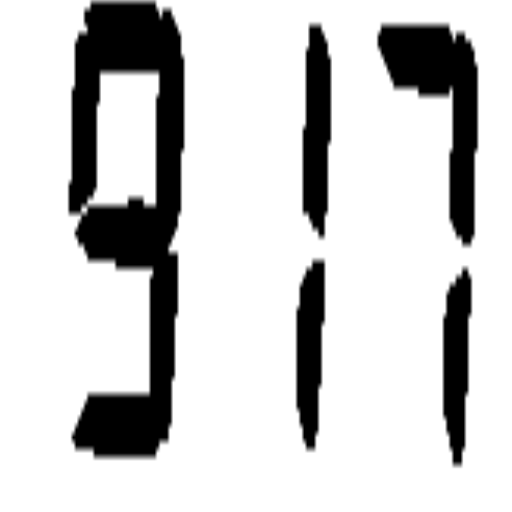

In [ ]:
img = cv2.imread("/content/20230331161715.png", 0)
img = cv2.resize(img, (512, 512))
cropped = img[35:512, 0:512]
img = cv2.resize(cropped, (512, 512))
print("01. Grayscale")
cv2_imshow(img)

02. Binary


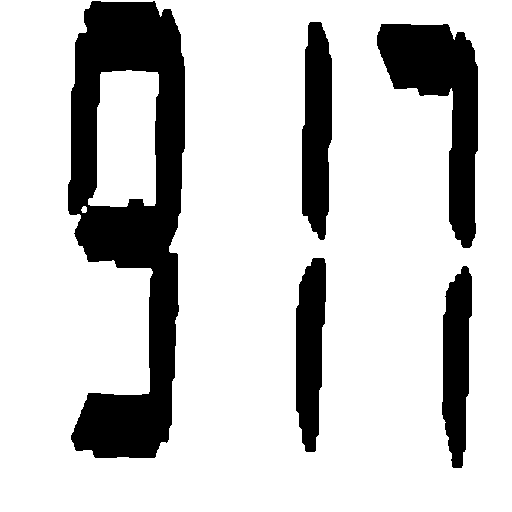

In [ ]:
bin_mat = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 105, 10)
print("02. Binary")
cv2_imshow(bin_mat)

03. Opening


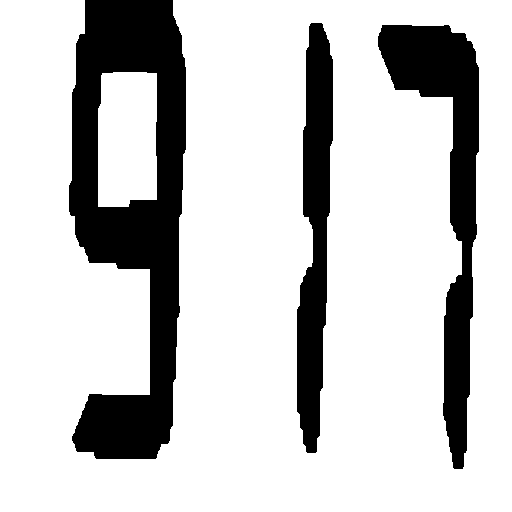

In [ ]:
element = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 30))
open_mat = cv2.morphologyEx(bin_mat, cv2.MORPH_OPEN, element)

print("03. Opening")
cv2_imshow(open_mat)

04. Remove white noise


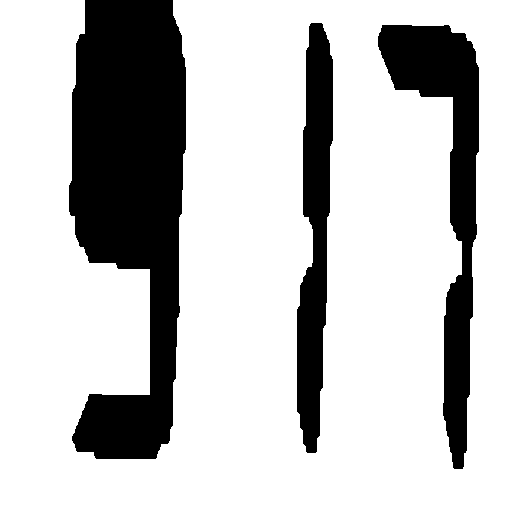

In [ ]:
im1 = delete_min_white_area(open_mat, 50000)

print("04. Remove white noise")
cv2_imshow(im1)

05. Remove black noise


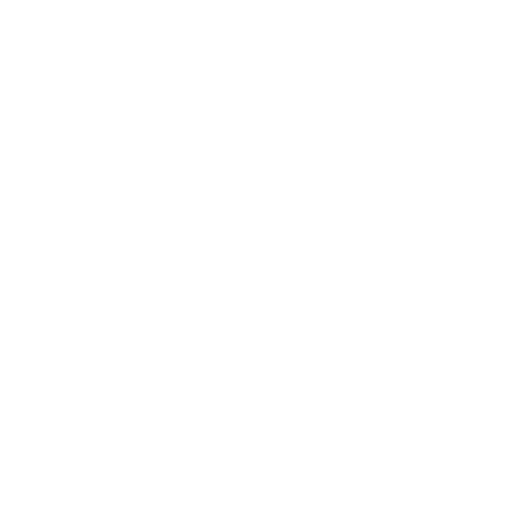

In [ ]:
im2 = delete_min_black_area(im1, 50000)
print("05. Remove black noise")
cv2_imshow(im2)

Eliminate main region gaps


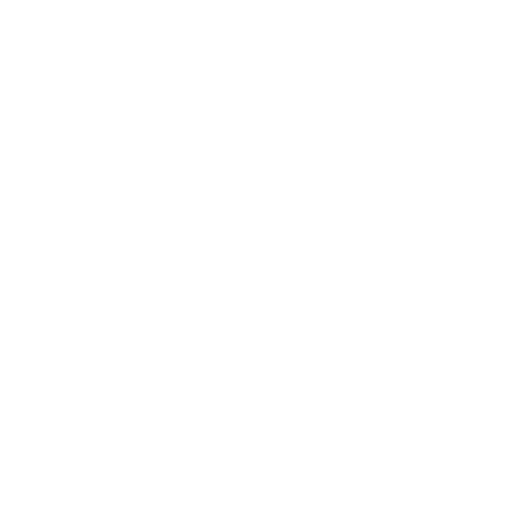

In [ ]:
element2 = cv2.getStructuringElement(cv2.MORPH_RECT, (51, 51))
im2_close = cv2.morphologyEx(im2, cv2.MORPH_CLOSE, element2)

print("Eliminate main region gaps")
cv2_imshow(im2_close)

06. Bitwise AND


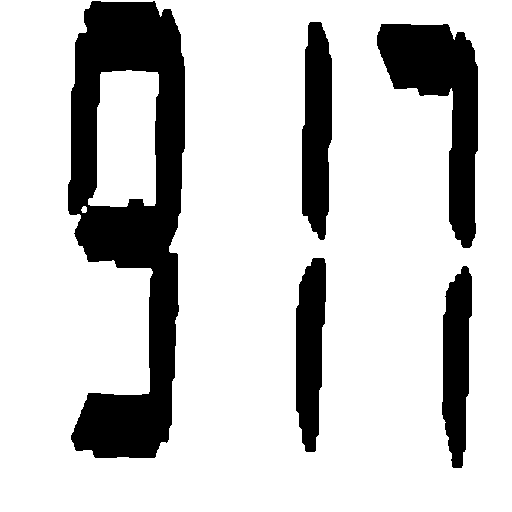

In [ ]:
ba = cv2.bitwise_and(bin_mat, im2_close)
print("06. Bitwise AND")
cv2_imshow(ba)

07. Closing


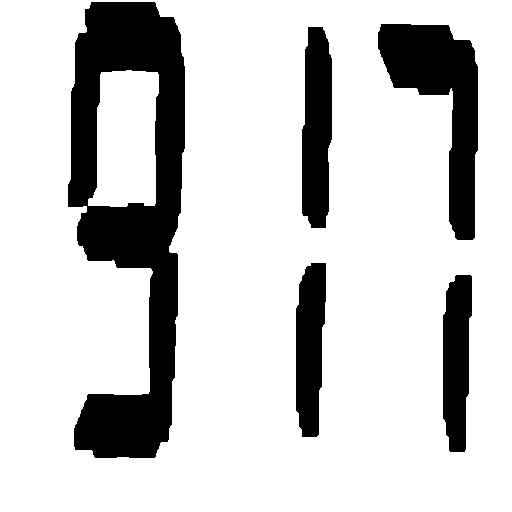

In [ ]:
element3 = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
ba_close = cv2.morphologyEx(ba, cv2.MORPH_CLOSE, element3)
print("07. Closing")
cv2_imshow(ba_close)


08. Remove black noise after closing


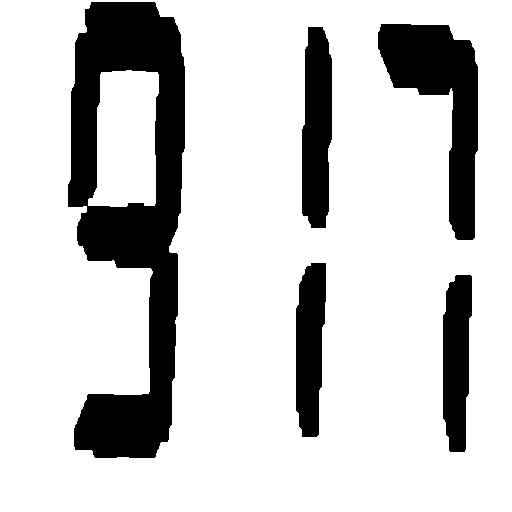

In [ ]:
im3 = delete_min_black_area(ba_close, 200)
print("08. Remove black noise after closing")
cv2_imshow(im3)

09. Single digit optimization


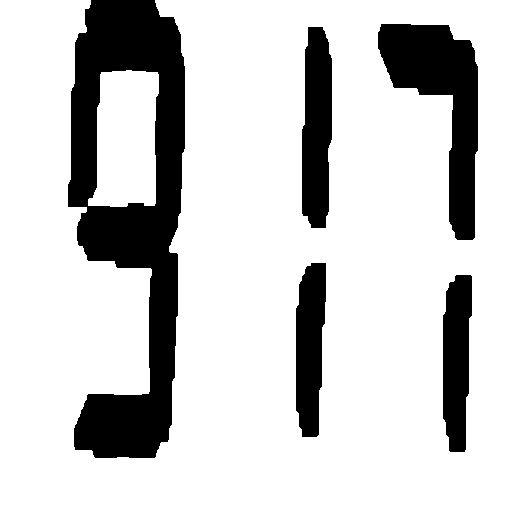

In [ ]:
element4 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
im3_open = cv2.morphologyEx(im3, cv2.MORPH_OPEN, element4)
# cv2.imshow("09. Single digit optimization", im3_open)
print("09. Single digit optimization")
cv2_imshow(im3_open)

03. Opening


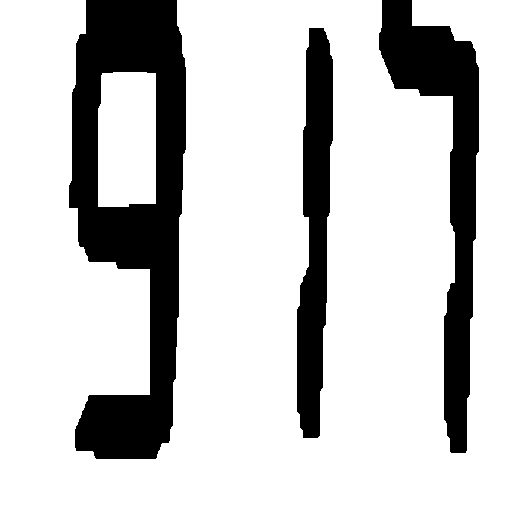

In [ ]:
element = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 50))
open_mat = cv2.morphologyEx(im3_open, cv2.MORPH_OPEN, element)

print("03. Opening")
cv2_imshow(open_mat)

10. Get digit region


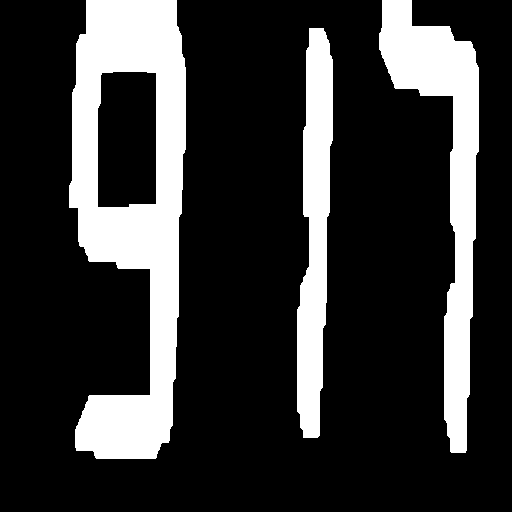

In [ ]:
# cv2.imshow("10. Get ROI digit region", im2_close - im3_open)
print("10. Get digit region")
roi = im2_close - open_mat
cv2_imshow(roi)

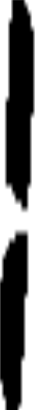

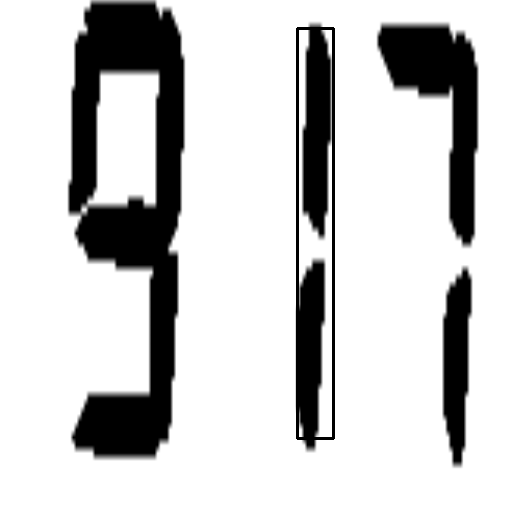

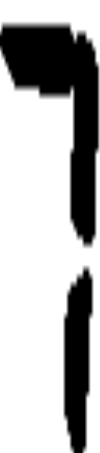

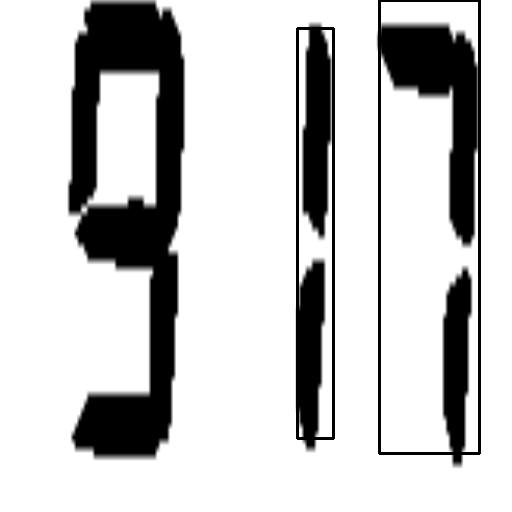

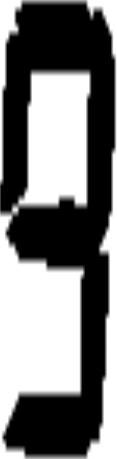

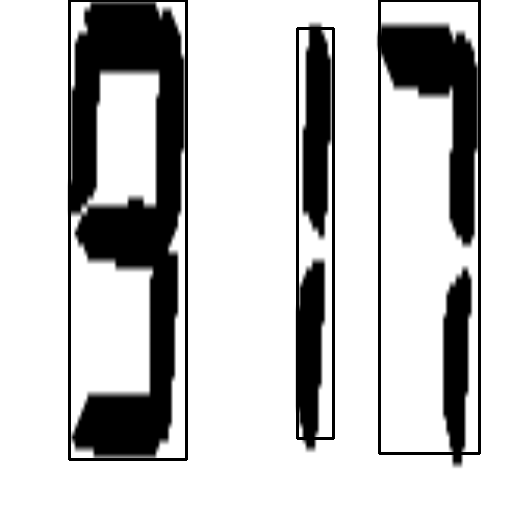

In [ ]:
contours, hierarchy = cv2.findContours(roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for _, c in enumerate(contours):

    boundRect = cv2.boundingRect(c)

    rectX = boundRect[0]
    rectY = boundRect[1]
    rectWidth = boundRect[2]
    rectHeight = boundRect[3]
    # print(rectWidth)
    # print(rectHeight)

    rectArea = rectWidth * rectHeight

    minArea = 5000

    if rectArea > minArea and rectHeight > rectWidth:

        color = (0, 0, 255)
        currentCrop = img[rectY:rectY+rectHeight,rectX:rectX+rectWidth]
        cv2_imshow(currentCrop)
        cv2.rectangle(img, (int(rectX), int(rectY)),
                      (int(rectX + rectWidth), int(rectY + rectHeight)), color, 2)
        cv2_imshow(img)

        